[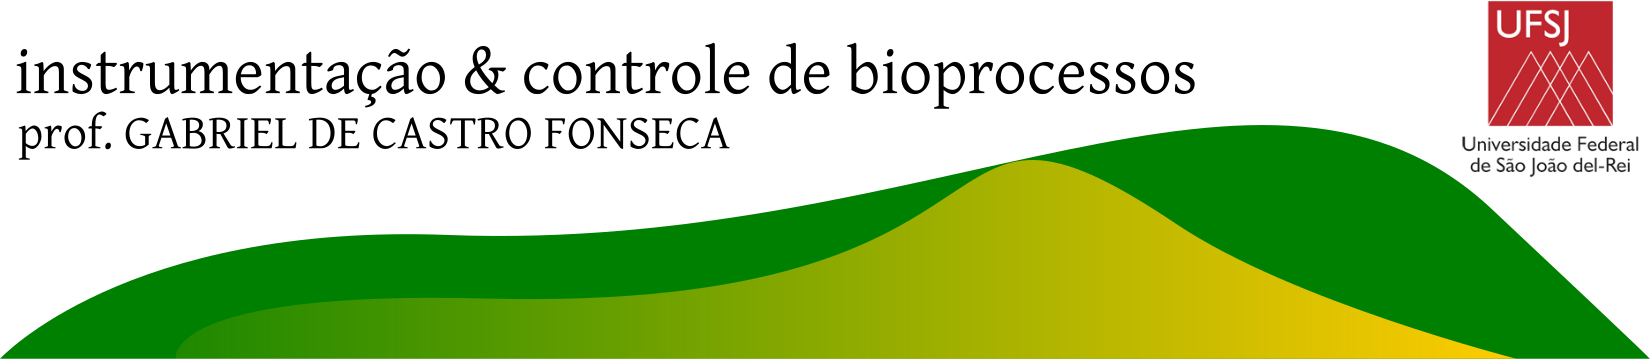](Aulas-Sumário.ipynb)

# Múltiplos Estímulos e Múltiplas Respostas

*Prof. Gabriel de Castro Fonseca (DQBIO/UFSJ)*<br>
*Instrumentação e Controle de Bioprocessos*

Este documento é publicado sob os termos da licença [GNU General Public Licence 3.0](https://www.gnu.org/licenses/gpl-3.0.en.html).

## Classificação dos sistemas por quantidade de estímulos e respostas 

Os sistemas dinâmicos podem ser classificados quanto ao número de estímulos e respostas (*input* e *output*) a que é submetido:

####  SISO *(single input, single output)*

Sistemas SISO envolvem um único estímulo ($u$) e uma única resposta ($y$). É o tipo mais simples de sistema dinâmico e a maioria dos exemplos que estudamos nesta disciplina se encaixam nessa categoria. Exemplo: 

$$
\tau \dot y + y = K u
$$

$$ 
\frac{y(t)}{u(t)} = \frac{K}{\tau s + 1} 
$$

#### MISO *(multiple input, single output)*

Em sistemas MISO, múltiplos estímulos influenciam uma única variável de resposta. Por exemplo, a temperatura no interior de um forno é afetada pela vazão de gás que passa pelo queimador e também pela temperatura ambiente. Esse sistema poderia ser descrito pela equação

$$
    \tau \dot y + y = K_1 u_1 + K_2 u_2
$$

$$
    y(t) = \left( \frac{K_1}{\tau s + 1} \right) u_1(t) + \left( \frac{K_2}{\tau s + 1} \right) u_2(t)
$$

#### SIMO *(single input, multiple output)*

Nos sistemas SIMO, um único estímulo afeta múltiplas variáveis de resposta. Um exemplo seria um sistema de tanques em série. Uma variação na vazão que alimenta o primeiro tanque (estímulo) teria efeito nos níveis de todos os tanques (respostas). Esse é um exemplo de sistema **multicapacitivos**, isto é sistemas formados por vários sistemas capacitivos em série. Vamos desenvolver esse exemplo em mais detalhes em breve.

#### MIMO *(multiple input, multiple output)*

O tipo mais complexo de sistema dinâmico é o MIMO, onde vários estímulos influenciam várias respostas. Pode-se citar como exemplo um reator exotérmico, onde a variação na concentração ou na temperatura da corrente de entrada (estímulos) influencia a concentração e a temperatura no interior do reator (respostas). Esse exemplo também será desenvolvido de forma mais detalhada mais tarde.

## Exemplo 1: tanques em série

Considere o sistema de três tanques em série mostrado na figura abaixo. 

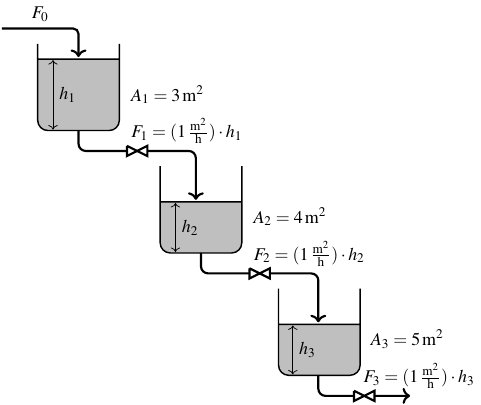

Os balanços materiais em cada tanque podem ser escritos como:

\begin{gather*}
    3\frac{dh_1}{dt} = F_0 - h_1 \\
    4\frac{dh_2}{dt} = h_1 - h_2 \\
    5\frac{dh_3}{dt} = h_2 - h_3 
\end{gather*}

Suponha que o valor desejado para o nível do primeiro tanque seja $h^*_1 = 1\rm\,m$. Isso implicaria que $F_0^* = 1\rm\,m^3/h$, $h_2^* = 1\rm\,m$ e $h_3^* = 1\rm\,m$.

Sejam $y_i = \delta h_i$ os desvios em relação dos níveis de cada tanque e $u = \delta F_0$ o desvio da vazão de alimentação do sistema em relação aos valores desejados, pode-se escrever os balanços materiais na forma de função de transferência como:

\begin{gather*}
    \frac{y_1(t)}{u(t)} = \frac{1}{3s+1} \\
    \frac{y_2(t)}{y_1(t)} = \frac{1}{4s+1} \\
    \frac{y_3(t)}{y_2(t)} = \frac{1}{5s+1}
\end{gather*}

Suponha que o sistema sofre um estímulo degrau $u(t) = 2\cdot\mathbf{1}^+(t)$. 

A relação entre $y_1$ e $u$ é de primeira ordem, portanto a resposta ao degrau é trivial:

\begin{gather*}
    y_1(t) = \frac{1}{3s+1} \cdot u(t) \\
    3 \dot y_1 + y_1 = 2\cdot\mathbf{1}^+(t) \\
    y_1(t) = 2(1-e^{-t/3})
\end{gather*}

Para encontrar a variação no nível do segundo tanque após o estímulo degrau fazemos

\begin{gather*}
   y_2(t) = \frac{1}{4s+1}\cdot y_1(t) \\
   y_2(t) = \frac{1}{4s+1}\cdot \frac{1}{3s+1} \cdot u(t) \\
   y_2(t) = \frac{2}{(4s+1)(3s+1)}\cdot\mathbf{1}^+(t) \\
   12\ddot y_2 + 7\dot y_2 + y_2 = 2\cdot\mathbf{1}^+(t)
\end{gather*}

Observe que a resposta do segundo tanque ao degrau tem dinâmica de segunda ordem.

Essa EDO tem solução particular $y_{2P} = 2$ e solução homogênea $y_{2H} = C_1e^{-t/4} + C_2e^{-t/3}$. Podemos encontrar a solução aplicando as condições iniciais $y_H(0) = 0$ e $\dot y_H(0) = 0$:

In [1]:
import sympy as sym
sym.init_printing()

t, C1, C2, y2 = sym.symbols('t, C1, C2, y2')
y2 = 2 + C1*sym.exp(-t/4) + C2*sym.exp(-t/3)
sym.solve([y2.subs(t,0), y2.diff(t).subs(t,0)],[C1,C2])

$$
    y_2(t) = 2 - 8 e^{-t/4} + 6 e^{-t/3}
$$

Vejamos agora como se comporta o terceiro tanque:

\begin{gather*}
    y_3(t) = \frac{1}{5s+1} \cdot y_2(t) \\
    y_3(t) = \frac{1}{5s+1} \cdot \frac{1}{4s+1}\cdot \frac{1}{3s+1} \cdot u(t) \\
    y_3(t) = \frac{2}{(5s+1)(4s+1)(3s+1)}\cdot\mathbf{1}^+(t) \\
    60 \,\dddot y_3 + 47\ddot y_3 + 12\dot y_1 + y_1 = 2\cdot\mathbf{1}^+(t)
\end{gather*}

O terceiro tanque tem dinâmica de terceira ordem e sua solução é $y_3 = 2 + C_1 e^{-t/5} + C_2 e^{-t/4} + C_3 e^{-t/3}$

In [2]:
C3, y3 = sym.symbols('C3, y3')
y3 = 2 + C1*sym.exp(-t/5) + C2*sym.exp(-t/4) + C3*sym.exp(-t/3)
sym.solve([ y3.subs(t,0) , y3.diff(t).subs(t,0), y3.diff(t,2).subs(t,0) ], [C1, C2, C3])

$$
    y_3(t) = 2 - 25 e^{-t/5} + 32 e^{-t/4} - 9 e^{-t/3}
$$

O sistema de tanques em série pode ser construído no Xcos seguindo-se a seguinte figura:

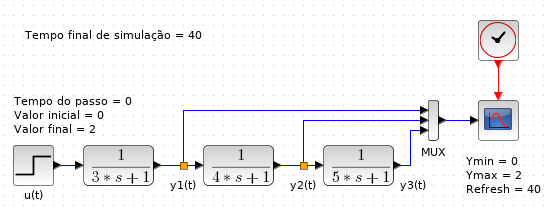

O gráfico abaixo mostra a variação nos níveis dos três tanques.

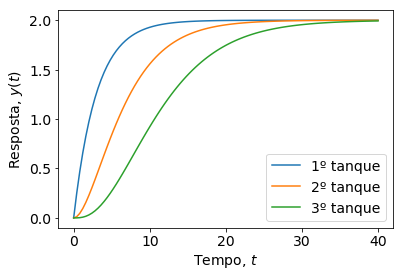

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def exemplo1(t):
    y1 = 2*(1-np.exp(-t/3))
    y2 = 2 - 8*np.exp(-t/4) + 6*np.exp(-t/3)
    y3 = 2 - 25*np.exp(-t/5) + 32*np.exp(-t/4) - 9*np.exp(-t/3)
    return y1, y2, y3

t = np.linspace(0,40,101)
y1, y2, y3 = exemplo1(t)
plt.rcParams.update({'font.size': 14})
plt.plot(t,y1, label = "1º tanque")
plt.plot(t,y2, label = "2º tanque")
plt.plot(t,y3, label = "3º tanque")
plt.xlabel("Tempo, $t$")
plt.ylabel("Resposta, $y(t)$")
plt.legend()

Cada tanque responde ao estímulo de uma forma diferente. A resposta do primeiro tanque ao degrau é de primeira ordem (tipo capacitiva). O segundo tanque tem uma resposta de segunda ordem (superamortecida). O terceiro tanque tem uma resposta de terceira ordem. Pode-se induzir que o $n$-ésimo tanque em um sistema de tanques não interativos em série teria resposta com dinâmica de $n$-ésima ordem.

Observe que quanto maior a ordem do sistema, mais lenta se torna a resposta ao degrau. O gráfico mais abaixo mostra como seria a resposta no último tanque em uma sequência de vinte tanques iguais.

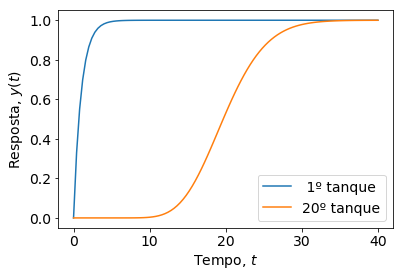

In [4]:
def ntq(t,n):
    s = 1
    for j in range(n):
        s -= np.exp(-t)*t**j/np.math.factorial(j)
    return s

x = 1 - np.exp(-t)
y = ntq(t,20)

plt.rcParams.update({'font.size': 14})
plt.plot(t,x,label=" 1º tanque")
plt.plot(t,y,label="20º tanque")
plt.xlabel("Tempo, $t$")
plt.ylabel("Resposta, $y(t)$")
plt.legend()

Observe que a resposta dinâmica do vigésimo tanque pode ser aproximada por uma modelo empírico de primeira ou segunda ordem com tempo morto. É vantajoso fazer esse tipo de aproximação porque sistemas multicapacitivos com ordem diferencial alta têm muitos parâmetros, que podem ser difíceis ou inconvenientes de medir e equacionar.

## Exemplo 2: Reator exotérmico

Uma reaçao exotérmica $A\rightarrow B$ ocorre em um reator de tanque agitado como o mostrado na figura:

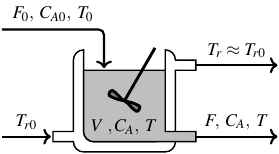

Consideramos a densidade do fluido constante e a vazão de fluido refrigerante grande o bastante para que a temperatura do fluido refrigerante permaneça aproximadamente constante ao longo do processo.

O comportamento dinâmico deste sistema pode ser representado pelo seguinte sistema de equações diferenciais:

\begin{align*}
    \frac{dV}{dt} &= F_0 - c_v \sqrt{V} \\
    \frac{dC_A}{dt} &= \frac{F_0}{V} (C_{A0} - C_A) - k_0 e^{-\frac{E}{RT}}C_A \\
    \frac{dT}{dt} &= \frac{F_0}{V} (T_{0} - T) + \frac{UA}{\rho V c_p} (T_r - T) - \frac{\Delta {h_R}^\circ}{\rho c_p} k_0 e^{-\frac{E}{RT}}C_A
\end{align*}

Neste sistema existem três variáveis resposta ($V$, $C_A$ e $T$) e quatro estímulos ($F_0$, $C_{A0}$, $T_0$ e $T_r$)

Vamos atribuir valores numéricos aos valores desejados e aos parâmetros:

* Estímulos: $\quad F_0^* = 1\rm\,L/s$, $\quad C_{A0}^* = 20\rm\,mol/L$, $\quad T_0^* = 290\rm\,K$, $\quad T_r = 275\rm\,K$ 
* Respostas: $\quad V^* = 1024\rm\,L$, $\quad C_A^* = 0,5\rm\,mol/L$, $\quad T^* = 300\rm\,K$
* Parâmetros: $\quad c_v = 0,3125\rm\,L^{2,5}/s$, $\quad \frac{E}{R} = 4500\rm\,K$, $\quad k_0 = 124500\rm\,s^{-1}$, $\quad UA = 100\rm\,W/K$, $\quad \Delta {h_R}^\circ = -128,2\rm\,J/mol$, $\quad \rho c_p = 5000\rm\,J/LK$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve
import ipywidgets as widgets

# Parâmetros
cv = 0.03125
ER = 4500
ko = 124500
UA = 100
Δhr = -2692.4
ρcp = 5000

def modelo(t,Fo,Co,To,Tr):
    def edo(y,t):
        V, C, T = y
        dVdt  = Fo - cv*np.sqrt(V)
        dCadt = Fo/V*(Co-C) - ko*np.exp(-ER/T)*C
        dTdt  = Fo/V*(To-T) + UA/ρcp/V*(Tr-T) - Δhr/ρcp*ko*np.exp(-ER/T)*C
        return dVdt, dCadt, dTdt
    return [odeint(edo,[1024,0.5,300],t), fsolve(lambda y: edo(y,0),[1000,0.5,300])]

# Função principal
def principal(Fo,Co,To,Tr):
    t = np.linspace(0,7200,301)
    y, ss = modelo(t,Fo,Co,To,Tr)
    V,C,T = [ y[:,i] for i in range(3) ]
    t/=60
    plt.rcParams["figure.figsize"] = (12,8)
    plt.subplot(2,2,1)
    plt.plot(t,V)
    plt.xlabel("Tempo (min)")
    plt.ylabel("Volume (L)")
    plt.subplot(2,2,2)
    plt.plot(t,C)
    plt.xlabel("Tempo (min)")
    plt.ylabel("Concentração (mol/L)")
    if np.abs(ss[1]-0.5) < 0.001:
        plt.ylim([0.4,0.6])
    plt.subplot(2,2,3)
    plt.plot(t,T)
    plt.xlabel("Tempo (min)")
    plt.ylabel("Temperatura (K)")
    if np.abs(ss[2]-300) < 0.01:
        plt.ylim([299.95,300.05])
    plt.subplot(2,2,4)
    plt.axis("off")
    plt.text(-0.1,0.2, 
            f"""
                Estado estacionário:
                
                $V$ = {ss[0]:6.1f} L
                $C$ = {ss[1]:6.3f} mol/L
                $T$ = {ss[2]:6.2f} K
            """,
             fontsize = 16
            )

# Estímulos
Fo_widget = widgets.FloatSlider(min=0.5, max=1.5, step=0.25, value=1, description = r'$F_0$')
Co_widget = widgets.FloatSlider(min=10, max=30, step= 5, value=20, description = r'$C_{A0}$')
To_widget = widgets.FloatSlider(min=280, max=300, step=5, value=290, description = r'$T_0$')
Tr_widget = widgets.FloatSlider(min=270, max=280, step=2.5, value=275, description = r'$T_r$')

w = widgets.interact_manual(principal, Fo = Fo_widget, Co = Co_widget, To = To_widget, Tr = Tr_widget)
w.widget.children[-2].description="Simular" 
w.widget.children[-1].layout.height = '550px'
display(w)

interactive(children=(FloatSlider(value=1.0, description='$F_0$', max=1.5, min=0.5, step=0.25), FloatSlider(va…

<function __main__.principal(Fo, Co, To, Tr)>

É possível observar nesse sistema, por exemplo, a dinâmica de resposta inversa se a vazão que alimenta o reator aumenta.

Como a alimentação está mais fria e mais concentrada que o interior reator, o aumento da vazão inicialmente causa um abaixamento da temperatura e um aumento na concentração de reagente. Entretanto, o aumento na concentração aumenta a velocidade de reação, o que leva a um aumento na temperatura e diminuição na concentração de reagente.

Além disso, evidentemente, o aumento na vazão aumenta também o volume de líquido no reator. Observe que um único estímulo afeta as três diferentes variáveis resposta. Variações na concentração de entrada ou nas temperaturas também afetam o balanço de reagente e o balanço de energia, de forma que os quatro estímulos podem interagir de forma complexa uns com os outros.

### Representação no espaço de estados

Vamos linearizar o reator exotérmico em torno da condição desejada. Após a linearização, nosso sistema de EDO original será transformado em

\begin{gather*}
    \left[ \begin{array}{c} \delta \dot V \\ \delta \dot C_A \\ \delta \dot T \end{array} \right] =
    \left[ \begin{array}{ccc} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33} \end{array} \right]
    \left[ \begin{array}{c} \delta V \\ \delta C_A \\ \delta T \end{array} \right] +
    \left[ \begin{array}{cccc} b_{11} & b_{12} & b_{13} & b_{14} \\ b_{21} & b_{22} & b_{23} & b_{24} \\ b_{31} & b_{32} & b_{33} & b_{34} \end{array} \right]
    \left[ \begin{array}{c} \delta F_0 \\ \delta C_{A0} \\ \delta T_0 \\ \delta T_r \end{array} \right]
\end{gather*}

onde $\quad a_{ij} = \left.\dfrac{\partial f_i}{\partial y_j}\right)_*$ e $\quad b_{ij} = \left.\dfrac{\partial f_i}{\partial u_j}\right)_*$, sendo que:
* $\quad f_i$ são as EDO não lineares (equações de balanço)
* $\quad y$ são as variáveis resposta ($V$, $C_A$, $T$)
* $\quad u$ são os estímulos ($F_0$, $C_{A0}$, $T_0$, $T_r$) 
* $\quad)_*$ indica que as derivadas parciais são avaliadas no estado desejado ($V^*$, $C_A^*$, etc.)

Por exemplo, o termo $a_{23}$ seria a derivada parcial da segunda equação (balanço molar de reagente) em relação à terceira variável (temperatura) e calculada para os valores desejados de todas as variáveis.

$$
    a_{23} = \frac{\partial}{\partial T}\left[ \frac{F_0}V(C_{A0}-C_A) - k_0 e^{-\frac{E}{RT}} C_A \right]_{(V^*,C_A^*,T^*,F_0^*,C_{A0}^* )}
$$

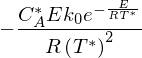

In [2]:
import sympy as sym
sym.init_printing()

# definição das variáveis
a23 = sym.symbols("a_{23}")
V, C, T = sym.symbols("V^*, C_A^*, T^*") # variáveis resposta
Fo, Co = sym.symbols("F_0^*, C_{A0}^*") # estímulo
E, R, ko_ = sym.symbols("E, R, k_0")

# definição das equações
f  = Fo/V*(Co-C) - ko_*sym.exp(-E/R/T)*C # balanço molar de reagente
df = sym.diff(f,T)
df

In [7]:
h = sym.Eq(a23,df.subs([(ER_,ER),(ko_,ko),(C,0.5),(T,300)])).evalf()
h

In [5]:
# definição das variáveis
V, C, T = sym.symbols("V, C_A, T") # variáveis resposta
Fo, Co, To, Tr = sym.symbols("F_0, C_{A0}, T_0, T_r") # estímulo
    # parâmetros
cv = 0.03125
ER = 4500
ko = 124500
UA = 100
Δhr = -2692.4
ρcp = 5000

# definição das equações
eq = [0,0,0]
eq[0] = Fo - cv*sym.sqrt(V)  # balanço de massa total (densidade constante)
eq[1] = Fo/V*(Co-C) - ko*sym.exp(-ER/T)*C # balanço molar de reagente
eq[2] = Fo/V*(To-T) + UA/ρcp/V*(Tr-T) - Δhr/ρcp*ko*sym.exp(-ER/T)*C # balanço de energia

# inicialização das matrizes
a = np.zeros([3,3]) # df/dy
b = np.zeros([3,4]) # df/du

# derivação das equações em relação às respostas e aos estímulos
subst = [(V,1024),(C,0.5),(T,300),(Fo,1),(Co,20),(To,290),(Tr,275)]
for i,eqn in enumerate(eq):
    for j,var in enumerate([V,C,T]):
        a[i,j] = eqn.diff(var).subs(subst)
    for k,est in enumerate([Fo,Co,To,Tr]):
        b[i,k] = eqn.diff(est).subs(subst)
        
# modelo linear
def modlinear(t,Fo,Co,To,Tr):
    def edo(y,t,u):
        # multiplicação matricial
        dy = [0,0,0]
        for i in range(3):
            for j in range(3):
                dy[i]+=a[i,j]*y[j]
            for k in range(4):
                dy[i]+=b[i,k]*u[k]
        return dy
    return odeint(edo,[0,0,0],t,args=([Fo,Co,To,Tr],))

Agora vamos plotar o sistema linearizado juntamente com o não linear a fim de estudar o quanto eles diferem um em relação ao outro.

In [6]:
# Função principal
def principal(Fo,Co,To,Tr):
    t = np.linspace(0,7200,301)
    y, ss = modelo(t,Fo,Co,To,Tr)
    x = modlinear(t,Fo-1,Co-20,To-290,Tr-275)
    z = ( x[:,0] + 1024 , x[:,1] + 0.5 , x[:,2] + 300 )
    V,C,T = ( (y[:,i],z[i]) for i in range(3) )
    t/=60
    plt.rcParams["figure.figsize"] = (12,8)
    plt.subplot(2,2,1)
    plt.plot(t,V[0], t,V[1])
    plt.xlabel("Tempo (min)")
    plt.ylabel("Volume (L)")
    plt.subplot(2,2,2)
    plt.plot(t,C[0], t,C[1])
    plt.xlabel("Tempo (min)")
    plt.ylabel("Concentração (mol/L)")
    if np.abs(ss[1]-0.5) < 0.001:
        plt.ylim([0.4,0.6])
    plt.subplot(2,2,3)
    plt.plot(t,T[0], t,T[1])
    plt.xlabel("Tempo (min)")
    plt.ylabel("Temperatura (K)")
    if np.abs(ss[2]-300) < 0.01:
        plt.ylim([299.95,300.05])
    plt.subplot(2,2,4)
    plt.axis('off')
    plt.plot(0,0,0,0)
    plt.legend(["não linear", "linearizado"],loc='center',fontsize = 14)

# Estímulos
Fo_widget = widgets.FloatSlider(min=0.5, max=1.5, step=0.25, value=1, description = r'$F_0$')
Co_widget = widgets.FloatSlider(min=10, max=30, step= 5, value=20, description = r'$C_{A0}$')
To_widget = widgets.FloatSlider(min=280, max=300, step=5, value=290, description = r'$T_0$')
Tr_widget = widgets.FloatSlider(min=270, max=280, step=2.5, value=275, description = r'$T_r$')

w = widgets.interact_manual(principal, Fo = Fo_widget, Co = Co_widget, To = To_widget, Tr = Tr_widget)
w.widget.children[-2].description="Simular" 
w.widget.children[-1].layout.height = '550px'
display(w)

interactive(children=(FloatSlider(value=1.0, description='$F_0$', max=1.5, min=0.5, step=0.25), FloatSlider(va…

<function __main__.principal(Fo, Co, To, Tr)>

Conforme o esperado, a linearização aproxima bem o comportamento do sistema para pequenas variações em relação ao estado desejado, mas não para grandes variações. Além disso, algumas interações complexas entre os estímulos também podem não ser previstos pelo modelo linearizado: experimente, por exemplo, aumentar $F_0$ e reduzir $C_{A0}$ e $T_0$ ao mesmo tempo.

Como mostramos neste exemplo, sistemas MIMO ao serem linearizados podem ser escritos em forma matricial. Esta forma de escrever o sistema é chamada de **representação no espaço de estados**.

De forma geral, equações diferenciais no espaço de estados podem ser escritas como

\begin{gather*}
    \mathbf{\dot x = Ax+Bu}\\
    \mathbf{y = Cx + Du}
\end{gather*}

* $\quad \mathbf x\;$ é o vetor das variáveis de estado ($V$, $C_{A}$, $T$ no nosso caso).
* $\quad \mathbf {\dot x}\;$ é o vetor das derivadas das variáveis de estado em relação ao tempo ($\dot V$, $\dot C_{A}$, $\dot T$).
* $\quad \mathbf u\;$ é o vetor dos estímulos ($F_0$, $C_{A0}$, $T_0$, $T_r$).
* $\quad \mathbf y\;$ é o vetor das variáveis resposta ($V$, $C_{A}$, $T$).
* $\quad \mathbf A\;$ é a matriz de linearização em relação às variáveis de estado.
* $\quad \mathbf B\;$ é a matriz de linearização em relação às variáveis estímulo.
* $\quad \mathbf C\;$ e $\;\mathbf D\;$ são as matrizes que relacionam a variável resposta às variáveis de estado e aos estímulos. Como em nosso caso as variáveis resposta são idênticas às variáveis de estado, $\;\mathbf C\;$ é a matriz identidade e $\;\mathbf D\;$ é a matriz nula.

Uma situação em que as variáveis resposta não seriam exatamente iguais ás variáveis de estado seria se, por exemplo, considerássemos a vazão de saída do tanque $F = c_v\sqrt{V} \approx F_0^* + \dfrac{c_v}{2\sqrt{V^*}}\delta V$ como uma variável resposta. 

$$
    \underbrace{\left[ \begin{array}{c} \delta  V \\ \delta  C_A \\ \delta  T \\ \delta F \end{array} \right]}_{\mathbf y} =
    \underbrace{\left[ \begin{array}{ccc} 1 & 0 & 0  \\ 0 & 1 & 0 \\ 0 & 0 & 1 \\ \frac{c_v}{2\sqrt{V^*}} & 0 & 0 \end{array} \right]}_{\mathbf C}
    \underbrace{\left[ \begin{array}{c} \delta V \\ \delta C_A \\ \delta T \end{array} \right]}_{\mathbf x}
$$

O diagrama de blocos abaixo mostra como nosso sistema linearizado pode ser construído no Xcos usando a representação no espaço de estados.

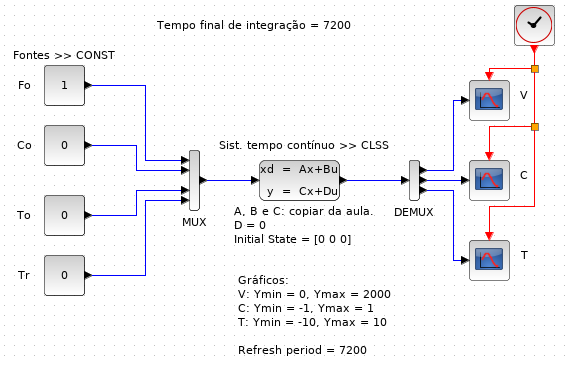

Observe que tanto os estímulos quanto as variáveis de estado/resposta estão escritos em termos de variáveis desvio, por isso no estado desejado todas as entradas e condições iniciais são iguais a zero.

Os valores das matrizes $\mathbf A$, $\mathbf B$ e $\mathbf C$ devem ser inseridos no bloco CLSS do Xcos na forma como estão impressos mais abaixo.

In [10]:
def matriz_xcos(M):
    lin, col = M.shape
    s = "[ "
    for i in range(lin):
        for j in range(col):
            s += f"{M[i,j]:.4g} "
        s += "; " if i < lin-1 else "]"
    return s

print("Matriz A:\n"+matriz_xcos(a))
print("\nMatriz B:\n"+matriz_xcos(b))
print("\nMatriz C:\n"+matriz_xcos(np.eye(3)))

Matriz A:
[ -0.0004883 0 0 ; -1.86e-05 -0.03906 -0.0009521 ; 1.001e-05 0.02051 -0.0004834 ]

Matriz B:
[ 1 0 0 0 ; 0.01904 0.0009766 0 0 ; -0.009766 0 0.0009766 1.953e-05 ]

Matriz C:
[ 1 0 0 ; 0 1 0 ; 0 0 1 ]


Observe que também é possível se representar problemas MIMO usando-se funções de transferência, no lugar da representação no espaço de estados. Seja $\mathbf{y = x}$,

\begin{gather*}
    \mathbf{\dot y = Ay+Bu}\\
    s\mathbf{y - Ay = Bu} \\
    (s\mathbf{I - A})\mathbf{y = Bu} \\
    \mathbf y = (s\mathbf{I-A})^{-1}\mathbf{B u} \\
    (s\mathbf{I-A})^{-1}\mathbf{B = G}(s)
\end{gather*}

onde $\mathbf{I}$ é a matriz identidade, o expoente $^{-1}$ indica matriz inversa e $\mathbf{G}(s)$ é a matriz de funções de transferência. Assim, o sistema pode ser escrito como

\begin{equation}
    \mathbf{y = G}(s)\mathbf{u}
\end{equation}

Representação no espaço de estados e funções de transferência são duas maneiras alternativas e equivalentes de se representar sistemas lineares com múltiplos estímulos e múltiplas respostas.

## Bibliografia

* C.A. Kluever (2018). Sistemas Dinâmicos: Modelagem, Simulação e Controle. LTC. Capítulos 5 e 7.
* B.W. Bequette. (2003). Process Control: Modeling, Design and Simulation. PHI Learning. Capítulo 3; Módulo 4.
* C. Garcia (2017). Controle de Processos Industriais: Estratégias Convencionais. Volume 1, Blucher. Capítulo 3.
* C.A. Smith, A. Corripio (2008). Princípios e Prática do Controle Automático de Processo. 3 a ed. LTC. Capítulo 4.
* J.C. Kantor (2019). [CBE 30338 Chemical Process Control](http://jckantor.github.io/CBE30338/). Capítulo 3.